In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy import signal
from scipy.signal import medfilt
import os
from datetime import datetime
from datetime import time

In [2]:
fft_size = 2048
fs = 2e6;
num_avg_window = 25
window_size = 501 

In [25]:
#path = '/Users/maggie/Documents/Maggie-Grad-School/HPDmobile/USRP-Related/USRP_data_collected/2019-10-28'
#path = '/Users/maggie/Documents/Maggie-Grad-School/HPDmobile/USRP-Related/filter_test/'
# save = '/Users/maggie/Documents/Maggie-Grad-School/HPDmobile/USRP-Related/output_test/'
path = '/Volumes/Samsung_T5/USRP-H1/'

# folders = [x for x in os.listdir(path) if x.endswith('00')]

days = [x for x in os.listdir(path) if x.startswith('2019-')]
#all_hours = []
raw_files = []
for day in days[0:2]:
    folders = [x for x in os.listdir(os.path.join(path, day)) if x.endswith('00')]
#     all_hours.extend(sorted(folders))
#     print(len(all_hours))

    for s in sorted(folders):
        for f in os.listdir(os.path.join(path, day, s)):
            if f.endswith('.txt'):
                raw_files.append(f)

    print(sorted(raw_files)[:5], sorted(raw_files)[-5:])
    print(len(sorted(raw_files)))


['2019-11-21_112601.txt', '2019-11-21_112709.txt', '2019-11-21_112816.txt', '2019-11-21_112924.txt', '2019-11-21_113032.txt'] ['2019-11-21_235438.txt', '2019-11-21_235545.txt', '2019-11-21_235653.txt', '2019-11-21_235800.txt', '2019-11-21_235908.txt']
672
['2019-11-21_112601.txt', '2019-11-21_112709.txt', '2019-11-21_112816.txt', '2019-11-21_112924.txt', '2019-11-21_113032.txt'] ['2019-11-22_235444.txt', '2019-11-22_235551.txt', '2019-11-22_235659.txt', '2019-11-22_235806.txt', '2019-11-22_235914.txt']
1955


In [108]:
# now = datetime.strptime('2019-10-21_165812', '%Y-%m-%d_%H%M%S')
# n2 = datetime.strptime('2019-10-21_165920', '%Y-%m-%d_%H%M%S')
# td = n2-now

In [55]:
def read_files(path):
    print(path)
    file_data = []
    file_time = []
    L = 0
    i = 0
    days = [x for x in os.listdir(path) if x.startswith('2019-')]
    for day in sorted(days):
        print(day)
        folders = [x for x in os.listdir(os.path.join(path, day)) if x.endswith('00')]
        for folder in sorted(folders):
            print(folder)
            files = [x for x in os.listdir(os.path.join(path, day, folder)) if x.endswith('.txt')]
            for f in sorted(files):
                file1 = open(os.path.join(path, day, folder, f), 'r') 
                try:
                    new_data = file1.readlines()

                    data = [float(x.strip('/n').split(' ')[1]) for x in new_data]
                    time = [x.strip('/n').split(' ')[0] for x in new_data]
                    file1.close()
                    file_data = file_data + data
                    file_time = file_time + time

                except Exception as e:
                    print('error reading {} file. Error: {}'.format(f, e))

    return file_data, file_time
 

In [56]:
path = '/Volumes/Samsung_T5/USRP-H1/'
raw, raw_time = read_files(path)

/Volumes/Samsung_T5/USRP-H1/
2019-11-21
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2019-11-22
0000
0100
0200
0300
0400
0500
0600
0700
0800
0900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2019-11-23
0000
0100
0200
0300
0400
0500
0600
0700
0800
0900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2019-11-24
0000
0100
0200
0300
0400
0500
0600
0700
0800
0900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2019-11-25
0000
0100
0200
0300
0400
0500
0600
0700
0800
0900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2019-11-26
0000
0100
0200
0300
0400
0500
0600
0700
0800
0900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2019-11-27
0000
0100
0200
0300
0400
0500
0600
0700
0800
0900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2019-11-28
0000
0100
0200
0300
0400
0500
0600
0700
0800
0900
1000
1100
1200
1300
1400
1500
1600
1700
1800
190

In [57]:
print(len(raw))
print(len(raw_time))


times = [datetime.strptime(s, '%Y-%m-%d_%H:%M:%S:%f') for s in raw_time]
print(len(times))
print(times[0], times[-1])

24584035
24584035
24584035
2019-11-21 11:26:01.393108 2019-11-29 16:10:24.644226


In [8]:
# s = '2019-10-28_19:04:31:611292'
# #d = s.split('_')[1].split(':')
# #d = time.strptime(':'.join(s.split('_')[1].split(':')[0:-1]), '%H:%M:%S')
# d = datetime.strptime(s, '%Y-%m-%d_%H:%M:%S:%f')
# print(d)


524925
2019-10-28 15:35:58.610957 2019-10-28 19:47:01.220664


In [58]:
def filter_norm (signal):
    print(len(signal))
    
#     total_time = len(signal)*(1/fs)
#     print(len(total_time))
#     bin_duration = fft_size*(1/fs)
#     time = np.arange(0.0, total_time-(1/fs), bin_duration)

    #indices = np.arange(0, len(time)-num_avg_window, num_avg_window)
    #print(indices)
    #time = np.take(time, indices)   
    
#     ind = np.arange(0, len(signal), 1)
#     td_times = [now + (i*td/len(signal)) for i in ind]
#     time = [x.strftime('%Y-%m-%d_%H:%M:%S:%f') for x in td_times]
#     print(time[0], time[-1])
#     to_save = tuple(zip(time, signal))
#     print(len(to_save))
#     np.savetxt(save+'test.txt', to_save, fmt='%s')

    
    sig_norm = (signal - np.min(signal))/(np.max(signal)-np.min(signal))
    for i in range(len(sig_norm)):
        if sig_norm[i] <= 0:
            sig_norm[i] = sig_norm[i+1]
            
    sig_filt = medfilt(sig_norm, window_size)
    
    return sig_filt

new_filtered = filter_norm(raw)
print(len(new_filtered))

24584035
24584035


524925


In [15]:
#Plotting for H1 test from 2019-10-28

# all_times = ['2019-10-28_18:12', '2019-10-28_18:43', '2019-10-28_18:46']
stove = ['2019-10-28_17:43', '2019-10-28_17:49']
fridge_act = ['2019-10-28_18:12', '2019-10-28_18:43']
microwave = ['2019-10-28_18:46', '2019-10-28_18:47']
lights = ['2019-10-28_18:50', '2019-10-28_18:55']
kitchen_misc = ['2019-10-28_19:12', '2019-10-28_19:44']

# t_coords = [datetime.strptime(s, '%Y-%m-%d_%H:%M') for s in all_times]

s_times = [datetime.strptime(s, '%Y-%m-%d_%H:%M') for s in stove]
f_times = [datetime.strptime(s, '%Y-%m-%d_%H:%M') for s in fridge_act]
m_times = [datetime.strptime(s, '%Y-%m-%d_%H:%M') for s in microwave]
l_times = [datetime.strptime(s, '%Y-%m-%d_%H:%M') for s in lights]
k_times = [datetime.strptime(s, '%Y-%m-%d_%H:%M') for s in kitchen_misc]


In [67]:

ys = ['2019-11-22_10:00', '2019-11-22_18:30']
print(ys)
y_times = [datetime.strptime(st, '%Y-%m-%d_%H:%M') for st in ys]
for t in y_times:
    print(t)

['2019-11-22_10:00', '2019-11-22_18:30']
2019-11-22 10:00:00
2019-11-22 18:30:00


In [77]:
import csv
entered = []
exited = []
with open('/Users/maggie/Downloads/all-H1.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        status, when = row[0], row[1].split('at')
        dt_day = datetime.strptime(str(when[0] + when[1]), '%B %d, %Y  %I:%M%p')
        if status == 'entered':
            entered.append(dt_day)
        else:
            exited.append(dt_day)

            
for e1, e2 in zip(entered,exited):
    print(e1,e2)



2019-11-21 11:20:00 2019-11-21 11:30:00
2019-11-21 18:12:00 2019-11-23 08:19:00
2019-11-23 13:20:00 2019-11-23 13:25:00
2019-11-23 14:40:00 2019-11-24 16:13:00
2019-11-24 16:50:00 2019-11-25 19:48:00
2019-11-25 21:30:00 2019-11-26 17:45:00
2019-11-26 21:55:00 2019-11-27 09:06:00
2019-11-27 12:00:00 2019-11-28 15:06:00
2019-11-28 23:30:00 2019-11-29 14:42:00


In [80]:
with open('/Users/maggie/Desktop/USRP_Nov21-Nov29.csv', mode='w') as usrp_file:
    usrp_writer = csv.writer(usrp_file, delimiter=',')
    for time, data in zip(times, new_filtered):
        usrp_writer.writerow([time, data])

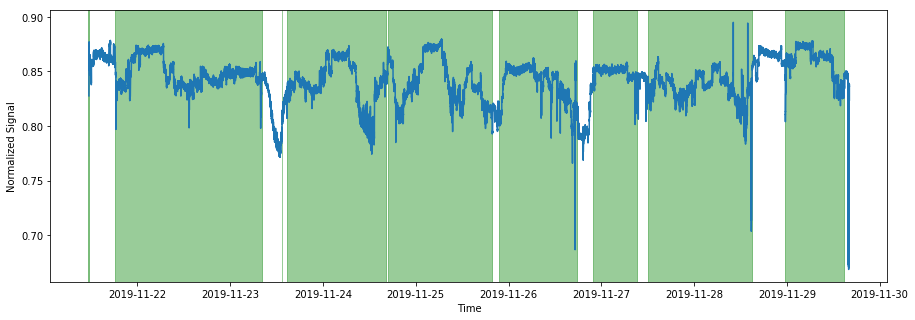

In [78]:
#Plotting for H1 test from 2019-10-28


plt.figure(figsize = (15,5))
plt.plot(times, new_filtered)
for e1, e2 in zip(entered,exited):
    plt.axvspan(e1, e2, color='green', alpha=0.4)

plt.xlabel('Time')
plt.ylabel('Normalized Signal')


plt.savefig('/Users/maggie/Desktop/2019-11-21_8days.png')

plt.show()

In [ ]:
#Plotting for H1 test from 2019-10-28

plt.figure(figsize = (15,5))
plt.plot(times, new_filtered)
#plt.axvline(x=t_times, color='r', linestyle='--')
# for tc in t_coords:
#     plt.axvline(x=tc, color='r', linestyle='--')

plt.axvspan(s_times[0], s_times[1], color='green', alpha=0.4)
plt.axvspan(f_times[0], f_times[1], color='aqua', alpha=0.4)
plt.axvspan(l_times[0], l_times[1], color='orange', alpha=0.4)
plt.axvspan(k_times[0], k_times[1], color='purple', alpha=0.4)

plt.xlabel('Time')
plt.ylabel('Normalized Signal')


plt.savefig('/Users/maggie/Desktop/2019-10-28_4hr.png')

plt.show()

In [18]:
# # day_str = '2019-10-21_165920'
# #datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')
# now = datetime.strptime('2019-10-21_165812', '%Y-%m-%d_%H%M%S')
# n2 = datetime.strptime('2019-10-21_165920', '%Y-%m-%d_%H%M%S')
# td = n2-now
# print(td/2343)

In [ ]:
# path_raw = '/Users/maggie/Documents/Maggie-Grad-School/HPDmobile/USRP-Related/raw_test/'

# raw_files = mylistdir(path_raw)
# raw_data = []


# for f in raw_files:
#     file1 = open(os.path.join(path_raw,f), 'r') 
#     new_data = file1.readlines()
#     data = [float(x.strip('/n')) for x in new_data]
#     file1.close()
#     raw_data = raw_data + data
#     print(len(data))

# print(len(raw_data))

## H6 read in data and plotting

In [33]:
path = '/Users/maggie/Documents/Maggie-Grad-School/HPDmobile/USRP-Related/USRP_data_collected/2019-10-27'


folders = [x for x in os.listdir(path) if x.endswith('00')]
print(sorted(folders))
raw_files = []
for s in sorted(folders):
    for f in os.listdir(os.path.join(path, s)):
        if f.endswith('.txt'):
            raw_files.append(f)

print(sorted(raw_files))
print(len(sorted(raw_files)))

raw, raw_time = read_files(path)
print(len(raw))
print(len(raw_time))


times = [datetime.strptime(s, '%Y-%m-%d_%H:%M:%S:%f') for s in raw_time]
print(len(times))
print(times[0], times[-1])

new_filtered = filter_norm(raw)
print(len(new_filtered))

['1400', '1500']
['2019-10-27_141910.txt', '2019-10-27_142018.txt', '2019-10-27_142125.txt', '2019-10-27_142233.txt', '2019-10-27_142340.txt', '2019-10-27_142447.txt', '2019-10-27_142555.txt', '2019-10-27_142702.txt', '2019-10-27_142810.txt', '2019-10-27_142917.txt', '2019-10-27_143024.txt', '2019-10-27_143132.txt', '2019-10-27_143239.txt', '2019-10-27_143346.txt', '2019-10-27_143454.txt', '2019-10-27_143601.txt', '2019-10-27_143708.txt', '2019-10-27_143816.txt', '2019-10-27_143923.txt', '2019-10-27_144030.txt', '2019-10-27_144138.txt', '2019-10-27_144245.txt', '2019-10-27_144353.txt', '2019-10-27_144500.txt', '2019-10-27_144607.txt', '2019-10-27_144715.txt', '2019-10-27_144822.txt', '2019-10-27_144929.txt', '2019-10-27_145037.txt', '2019-10-27_145144.txt', '2019-10-27_145251.txt', '2019-10-27_145359.txt', '2019-10-27_145506.txt', '2019-10-27_145614.txt', '2019-10-27_145721.txt', '2019-10-27_145828.txt', '2019-10-27_145936.txt', '2019-10-27_150043.txt', '2019-10-27_150150.txt', '2019-1

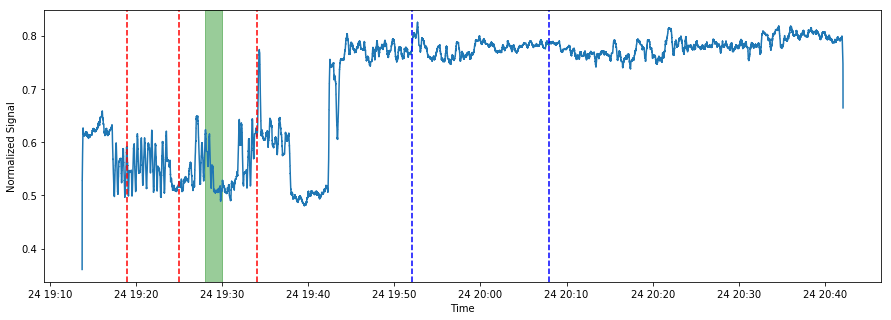

In [29]:
# plotting for H6 2019-10-24 

all_times = ['2019-10-24_19:19', '2019-10-24_19:25', '2019-10-24_19:34']
comp_times = ['2019-10-24_19:52', '2019-10-24_20:08']

t_coords = [datetime.strptime(s, '%Y-%m-%d_%H:%M') for s in all_times]
c_coords = [datetime.strptime(s, '%Y-%m-%d_%H:%M') for s in comp_times]

TV = ['2019-10-24_19:28', '2019-10-24_19:30']
tv_times = [datetime.strptime(s, '%Y-%m-%d_%H:%M') for s in TV]

plt.figure(figsize = (15,5))
plt.plot(times, new_filtered)
for tc in t_coords:
    plt.axvline(x=tc, color='r', linestyle='--')

for tc in c_coords:
    plt.axvline(x=tc, color='b', linestyle='--')    
plt.axvspan(tv_times[0], tv_times[1], color='green', alpha=0.4)

plt.xlabel('Time')
plt.ylabel('Normalized Signal')


plt.savefig('/Users/maggie/Desktop/2019-10-24_90min.png')

plt.show()

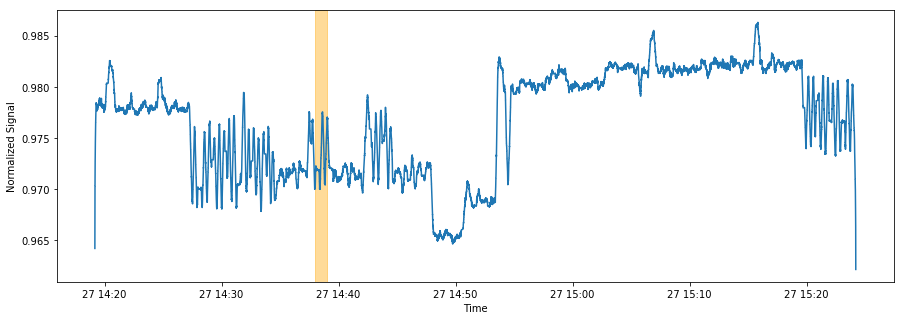

In [35]:
# plotting for H6 2019-10-27

#all_times = ['2019-10-27_14:38', '2019-10-24_19:25', '2019-10-24_19:34']
#t_coords = [datetime.strptime(s, '%Y-%m-%d_%H:%M') for s in all_times]

T = ['2019-10-27_14:38', '2019-10-27_14:39']
t_times = [datetime.strptime(s, '%Y-%m-%d_%H:%M') for s in T]


plt.figure(figsize = (15,5))
plt.plot(times, new_filtered)
# for tc in t_coords:
#     plt.axvline(x=tc, color='r', linestyle='--')
    
plt.axvspan(t_times[0], t_times[1], color='orange', alpha=0.4)

plt.xlabel('Time')
plt.ylabel('Normalized Signal')


plt.savefig('/Users/maggie/Desktop/2019-10-27_1hr.png')

plt.show()